In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import pylab
import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats.distributions import chi2
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima
from pmdarima.arima import OCSBTest

In [3]:
data_wti = pd.read_csv(r'C:\Users\USUARIO\Documents\GitHub\Oil-Gas-Projects\Oil Market\Datasets\wti-daily_csv.csv', parse_dates=['Date'])
data_rents = pd.read_csv(r'C:\Users\USUARIO\Documents\GitHub\Oil-Gas-Projects\Oil Market\Datasets\Oil rents by country.csv', header=[2])
wti_last_month = pd.read_csv(r'C:\Users\USUARIO\Documents\GitHub\Oil-Gas-Projects\Oil Market\Datasets\DCOILWTICO.csv', parse_dates=['DATE'])

In [4]:
rents_ecu = data_rents[(data_rents['Country Name'] == 'Ecuador')].T

In [5]:
rents_ecu

,66
Country Name,Ecuador
Country Code,ECU
Indicator Name,Oil rents (% of GDP)
Indicator Code,NY.GDP.PETR.RT.ZS
1960,NaN
...,...
2018,7.166329
2019,6.610501
2020,4.394566
2021,NaN


<AxesSubplot:>

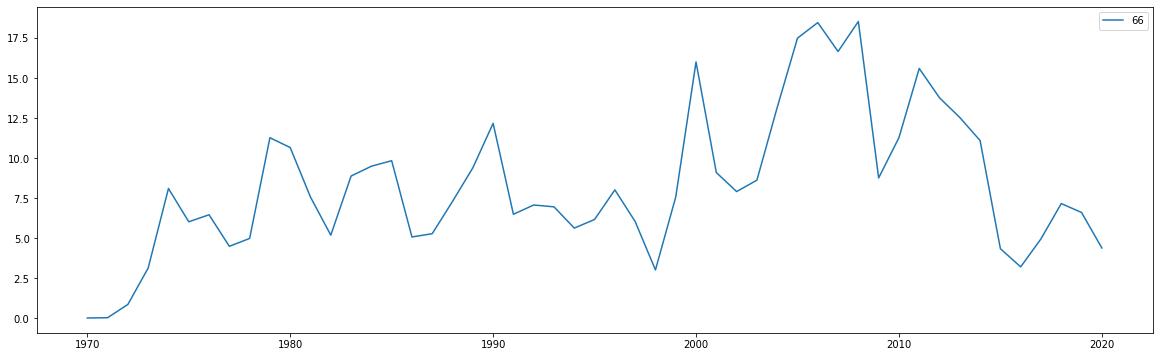

In [6]:
rents_ecu.iloc[14:-2].plot(figsize=(20,6))

In [7]:
data_wti.Date.describe()

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_9788\1887816428.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data_wti.Date.describe()


count                    9232
unique                   9232
top       1986-01-02 00:00:00
freq                        1
first     1986-01-02 00:00:00
last      2022-08-22 00:00:00
Name: Date, dtype: object

In [8]:
data_wti.set_index('Date', inplace=True)

In [9]:
data_wti.head(3)

,Price
Date,
1986-01-02,25.56
1986-01-03,26.00
1986-01-06,26.53


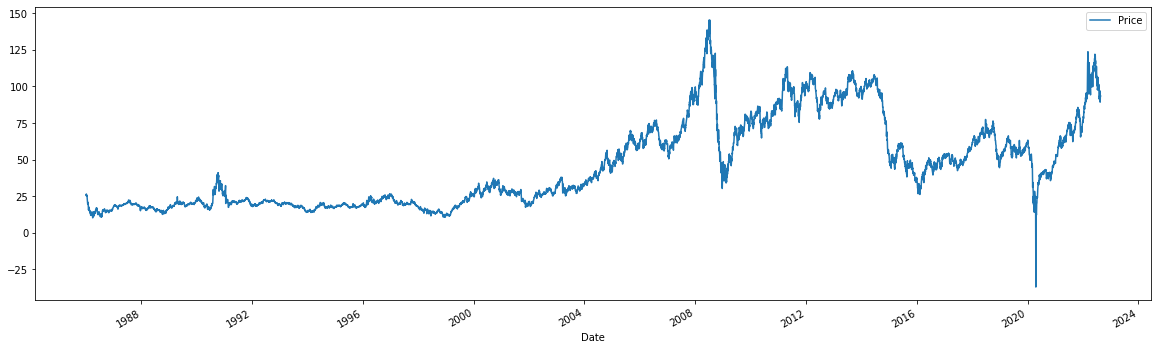

In [10]:
data_wti.plot(figsize=(20,6));

## Key Dates for Oil Industry

In [11]:
gulf_war = '1990-10-2'
attack_911 = '2001-9-11' 
fina_crisis = '2008-9-25'
peak_shale = '2014-6-20'
covid_19 = '2019-12-31'
war_rus_ukr = '2022-04-24'
train_date = '2022-08-22'

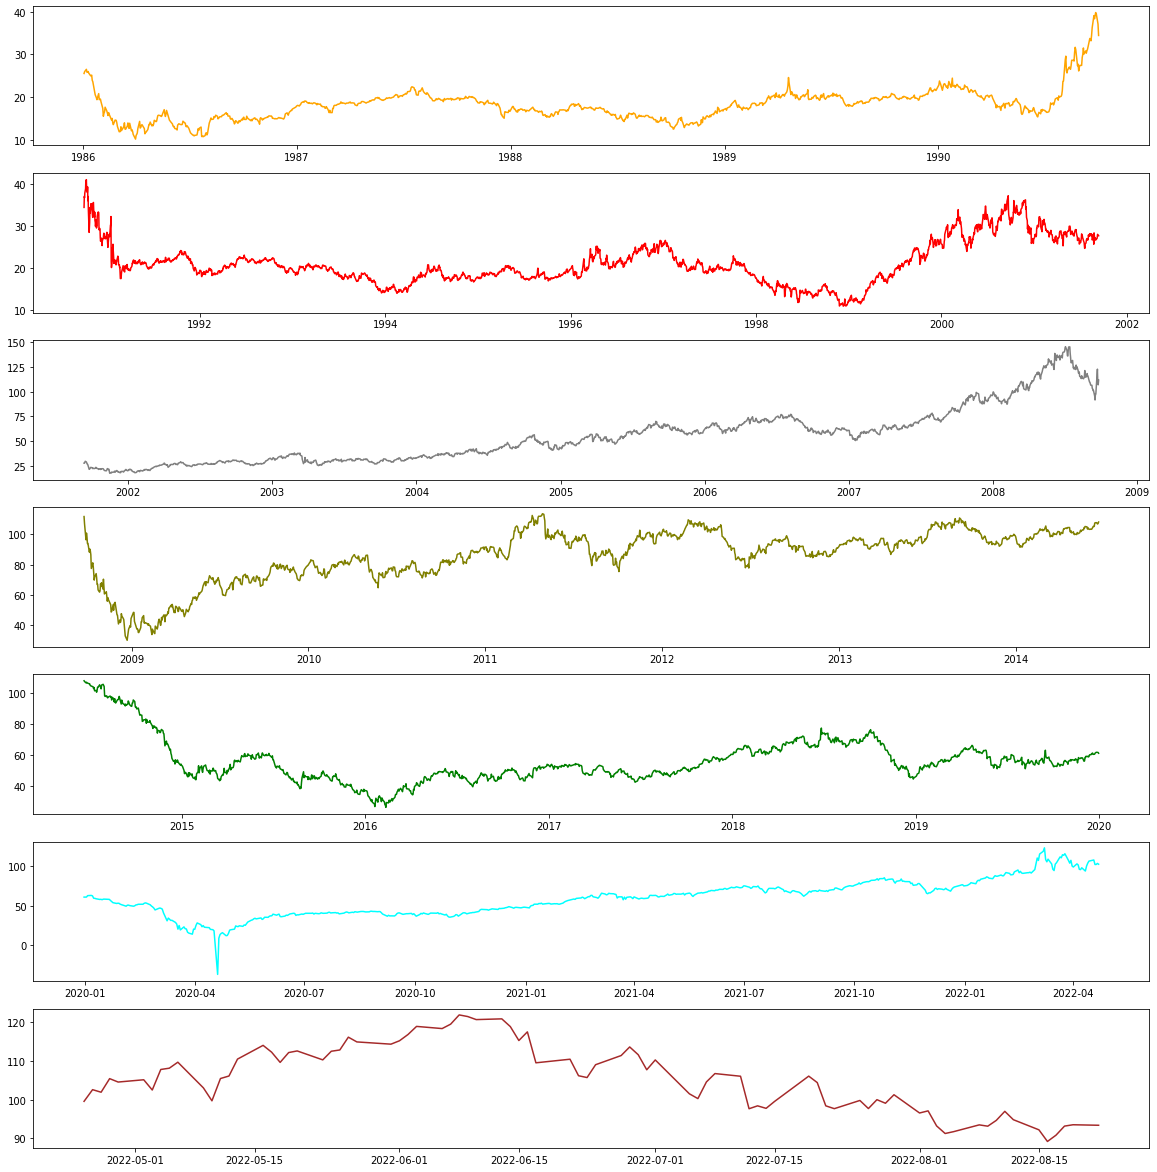

In [12]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(7, figsize=(20,21))
ax1.plot(data_wti[:gulf_war], color='orange')
ax2.plot(data_wti[gulf_war:attack_911], color='red')
ax3.plot(data_wti[attack_911:fina_crisis], color='gray')
ax4.plot(data_wti[fina_crisis:peak_shale], color='olive')
ax5.plot(data_wti[peak_shale:covid_19], color='green')
ax6.plot(data_wti[covid_19:war_rus_ukr], color='cyan')
ax7.plot(data_wti[war_rus_ukr:], color='brown')
plt.show()

In [13]:
data_wti.describe()

,Price
count,9232.000000
mean,45.661145
std,29.492842
min,-36.980000
25%,19.940000
50%,34.910000
75%,66.035000
max,145.310000


### Normal Distribution

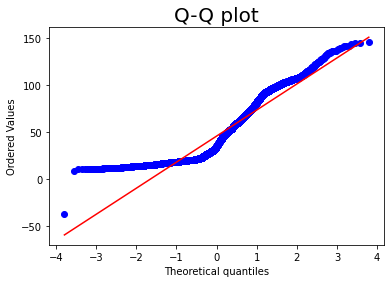

In [14]:
scipy.stats.probplot(data_wti.Price, plot=pylab)
plt.title('Q-Q plot', size=20)
pylab.show() 

In [15]:
data_wti.describe()

,Price
count,9232.000000
mean,45.661145
std,29.492842
min,-36.980000
25%,19.940000
50%,34.910000
75%,66.035000
max,145.310000


### Stationarity

In [16]:
# Determine p-value to determine if data is stationary
sts.adfuller(data_wti)

(-2.213377714641542,
 0.2014259950861617,
 38,
 9193,
 {'1%': -3.4310615334378807,
  '5%': -2.861854452413968,
  '10%': -2.5669373779569864},
 32747.08402618017)

### Seasonality

In [17]:
price_wti = data_wti.asfreq('B')
price_wti.isnull().sum()

Price    326
dtype: int64

In [18]:
price_wti = price_wti.fillna(value=price_wti.mean())
price_wti = price_wti[war_rus_ukr:]

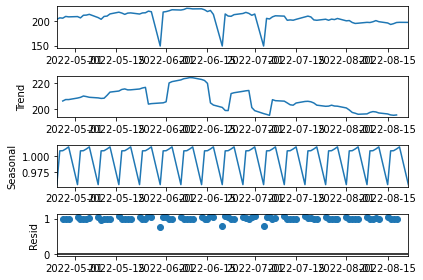

In [19]:
s_dec_multiplicative = seasonal_decompose((price_wti + price_wti.mean()), model = "multiplicative")
s_dec_multiplicative.plot()
plt.show()

## Prices

### ACF

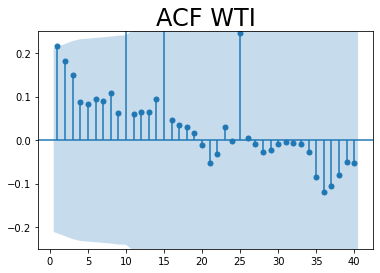

In [20]:
sgt.plot_acf(price_wti, lags=40, zero=False)
plt.title("ACF WTI", size = 24)
plt.ylim(-0.25, 0.25)
plt.show()

### PACF

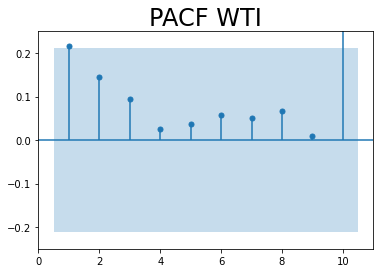

In [21]:
sgt.plot_pacf(price_wti.Price, lags = 10, zero = False, method = ('ols'))
plt.title("PACF WTI", size = 24)
plt.ylim(-0.25,0.25)
plt.show()

### Auto Regresive Modeling

In [22]:
model_ar_15 = ARIMA(price_wti.Price, order=(15,0,0))
results_ar_15 = model_ar_15.fit()
results_ar_15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                   86
Model:                ARIMA(15, 0, 0)   Log Likelihood                -337.074
Date:                Mon, 26 Sep 2022   AIC                            708.149
Time:                        16:12:09   BIC                            749.873
Sample:                    04-25-2022   HQIC                           724.941
                         - 08-22-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        101.4698     14.362      7.065      0.000      73.321     129.619
ar.L1          0.1408      0.116      1.216      0.224      -0.086       0.368
ar.L2          0.0997      0.138      0.721      0.471      -0.171       0.371
ar.L3          0.0752      0.156      0.482      0.630      -0.231       0.381
ar.L4         -0.0014      0.216     -0.007      0.995      -0.425       0.422
ar.L5         -0.0609      0.161     -0.377      0.706      -0.377       0.255
ar.L6          0.0499      0.153      0.325      0.745      -0.251       0.351
ar.L7          0.0114      0.163      0.070      0.944      -0.307       0.330
ar.L8          0.0330      0.178      0.185      0.853      -0.316       0.382
ar.L9         -0.0294      0.238     -0.124      0.902      -0.497       0.438
ar.L10         0.2412      0.081      2.966      0.003       0.082       0.401
ar.L11        -0.0368      0.407     -0.090      0.928      -0.835       0.761
ar.L12        -0.0280      0.440     -0.064      0.949      -0.889       0.833
ar.L13        -0.0256      0.269     -0.095      0.924      -0.552       0.501
ar.L14         0.0306      0.274      0.112      0.911      -0.506       0.567
ar.L15         0.2888      0.080      3.605      0.000       0.132       0.446
sigma2       144.7032     15.593      9.280      0.000     114.141     175.266
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):               624.47
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               0.20   Skew:                            -2.83
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Analysing the Residuals

In [23]:
price_wti['p_resid_ar_15'] = results_ar_15.resid

In [24]:
price_wti.p_resid_ar_15.mean(), price_wti.p_resid_ar_15.var()

(-0.28399232407649716, 146.6395564728969)

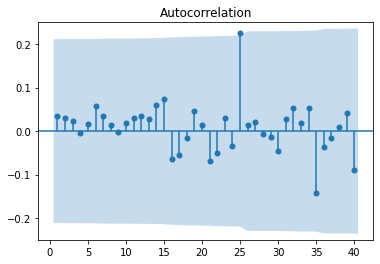

In [25]:
sgt.plot_acf(price_wti.p_resid_ar_15, zero=False, lags=40)
plt.ylim(-0.25,0.25)
plt.show()

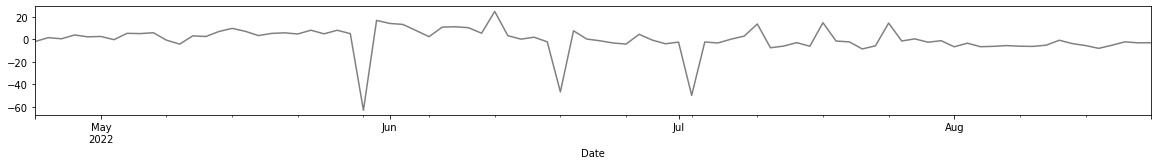

In [26]:
price_wti.p_resid_ar_15.plot(figsize=(20,2), color='grey');

### Auto Regresive Moving Average Modeling

In [27]:
model_ar_15_ma_3 = ARIMA(price_wti.Price, order=(15,0,3))
results_ar_15_ma_3 = model_ar_15_ma_3.fit()
results_ar_15_ma_3.summary()

c:\Users\USUARIO\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                   86
Model:                ARIMA(15, 0, 3)   Log Likelihood                -336.360
Date:                Mon, 26 Sep 2022   AIC                            712.720
Time:                        16:12:11   BIC                            761.807
Sample:                    04-25-2022   HQIC                           732.475
                         - 08-22-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        102.3565     12.990      7.879      0.000      76.896     127.817
ar.L1         -0.1344      0.719     -0.187      0.852      -1.544       1.276
ar.L2         -0.1044      0.805     -0.130      0.897      -1.683       1.474
ar.L3         -0.0562      0.983     -0.057      0.954      -1.982       1.870
ar.L4          0.0801      0.413      0.194      0.846      -0.730       0.890
ar.L5         -0.0221      0.230     -0.096      0.923      -0.472       0.428
ar.L6          0.0715      0.153      0.468      0.640      -0.228       0.371
ar.L7          0.0298      0.160      0.187      0.852      -0.283       0.343
ar.L8          0.0540      0.237      0.228      0.819      -0.410       0.518
ar.L9         -0.0063      0.360     -0.017      0.986      -0.712       0.700
ar.L10         0.2507      0.135      1.855      0.064      -0.014       0.516
ar.L11         0.0323      0.491      0.066      0.947      -0.929       0.994
ar.L12         0.0175      0.643      0.027      0.978      -1.242       1.277
ar.L13         0.0095      0.386      0.025      0.980      -0.747       0.766
ar.L14         0.0177      0.329      0.054      0.957      -0.626       0.662
ar.L15         0.3022      0.180      1.675      0.094      -0.051       0.656
ma.L1          0.3102      0.733      0.423      0.672      -1.127       1.747
ma.L2          0.2894      0.872      0.332      0.740      -1.419       1.998
ma.L3          0.2335      1.020      0.229      0.819      -1.765       2.232
sigma2       143.5347     19.641      7.308      0.000     105.039     182.031
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               593.36
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.22   Skew:                            -2.73
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Analysing the Residuals

In [28]:
price_wti['p_resid_ar15_ma3'] = results_ar_15_ma_3.resid

In [29]:
price_wti.p_resid_ar15_ma3.mean(), price_wti.p_resid_ar15_ma3.var(),

(-0.2720012664518686, 143.92668339387401)

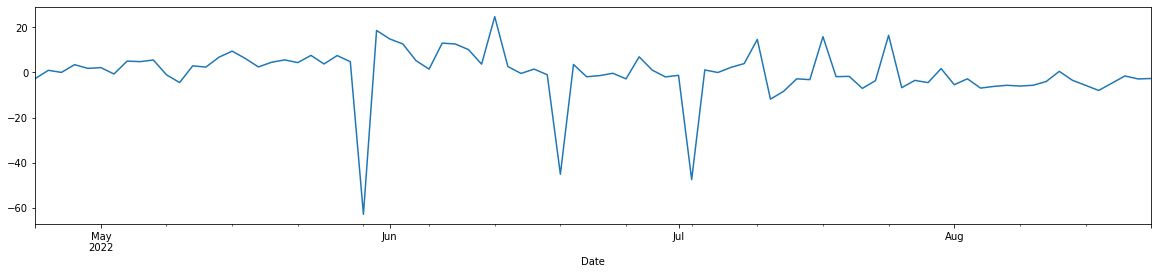

In [30]:
price_wti.p_resid_ar15_ma3.plot(figsize=(20,4));

## Returns

In [31]:
price_wti['p_returns'] = price_wti.Price.pct_change(1).mul(100)
price_wti = price_wti[1:]

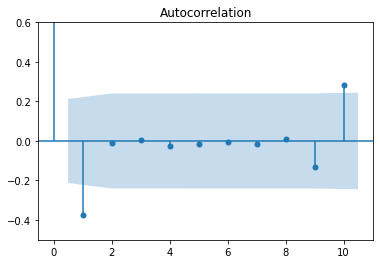

In [32]:
sgt.plot_acf(price_wti.p_returns, lags=10)
plt.ylim(-0.5,0.6)
plt.show()

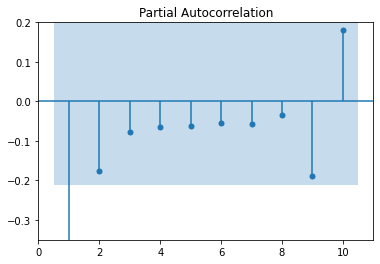

In [33]:
sgt.plot_pacf(price_wti.p_returns, lags = 10, zero = False, method = ('ols'))
plt.ylim(-0.35,0.2)
plt.show()

### Auto Regresive Modeling

In [34]:
model_ret_ar_5 = ARIMA(price_wti.p_returns, order=(5, 0, 0))
results_ret_ar_5 = model_ret_ar_5.fit()
results_ret_ar_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              p_returns   No. Observations:                   85
Model:                 ARIMA(5, 0, 0)   Log Likelihood                -396.600
Date:                Mon, 26 Sep 2022   AIC                            807.200
Time:                        16:12:13   BIC                            824.298
Sample:                    04-26-2022   HQIC                           814.077
                         - 08-22-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8904      2.727      1.060      0.289      -2.454       8.235
ar.L1         -0.4570      0.084     -5.471      0.000      -0.621      -0.293
ar.L2         -0.2247      0.192     -1.168      0.243      -0.602       0.152
ar.L3         -0.1173      0.361     -0.325      0.745      -0.825       0.591
ar.L4         -0.0904      0.489     -0.185      0.853      -1.049       0.868
ar.L5         -0.0596      0.464     -0.128      0.898      -0.969       0.850
sigma2       659.0662     72.609      9.077      0.000     516.755     801.378
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               380.54
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.06   Skew:                             2.10
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Analyzing Residuals of Returns

In [35]:
price_wti['p_ret_resid_ar_5'] = results_ret_ar_5.resid

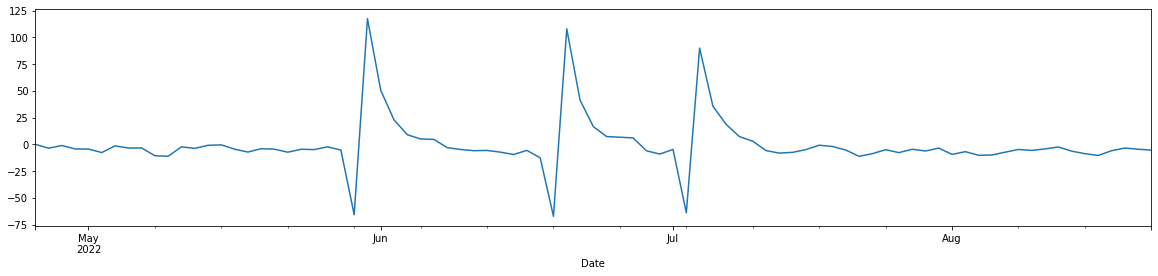

In [36]:
price_wti.p_ret_resid_ar_5.plot(figsize=(20,4));

In [37]:
price_wti.p_ret_resid_ar_5.mean(), price_wti.p_ret_resid_ar_5.var()

(-0.023309034871262152, 666.9219807866713)

### Auto Regresive Moving Average Modeling

In [38]:
model_ret_ar5_ma5 = ARIMA(price_wti.p_returns, order=(5,0,5))
results_ret_ar5_ma5 = model_ret_ar5_ma5.fit()
results_ret_ar5_ma5.summary()

c:\Users\USUARIO\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\USUARIO\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\USUARIO\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              p_returns   No. Observations:                   85
Model:                 ARIMA(5, 0, 5)   Log Likelihood                -394.074
Date:                Mon, 26 Sep 2022   AIC                            812.148
Time:                        16:12:14   BIC                            841.460
Sample:                    04-26-2022   HQIC                           823.938
                         - 08-22-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6186      1.052      3.440      0.001       1.557       5.680
ar.L1          0.0789      0.263      0.301      0.764      -0.436       0.594
ar.L2         -0.1306      0.298     -0.439      0.661      -0.714       0.453
ar.L3          0.0765      0.262      0.292      0.770      -0.437       0.590
ar.L4         -0.3326      0.181     -1.838      0.066      -0.687       0.022
ar.L5          0.6483      0.196      3.303      0.001       0.264       1.033
ma.L1         -0.4348      5.552     -0.078      0.938     -11.317      10.447
ma.L2          0.0991      3.241      0.031      0.976      -6.253       6.451
ma.L3         -0.2138      3.844     -0.056      0.956      -7.747       7.319
ma.L4          0.4645      3.019      0.154      0.878      -5.454       6.383
ma.L5         -0.9131      5.229     -0.175      0.861     -11.161       9.335
sigma2       581.2792   3280.773      0.177      0.859   -5848.918    7011.477
===================================================================================
Ljung-Box (L1) (Q):                   0.74   Jarque-Bera (JB):               354.79
Prob(Q):                              0.39   Prob(JB):                         0.00
Heteroskedasticity (H):               0.16   Skew:                             2.08
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Returns vs. Predictions

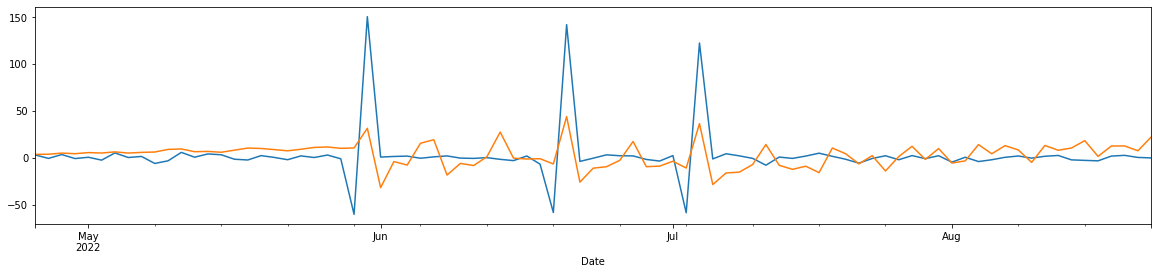

In [39]:
price_wti.p_returns.plot(figsize=(20,4))
results_ret_ar5_ma5.predict().plot(figsize=(20,4))
plt.show()

#### Analyzing ARMA Residuals

In [40]:
price_wti['p_ret_resid_ar5_ma5'] = results_ret_ar5_ma5.resid

In [41]:
price_wti.p_ret_resid_ar5_ma5.mean(), price_wti.p_ret_resid_ar5_ma5.var()

(-0.2276471819761592, 622.588172981903)

## Auto-ARIMA Modeling

### Prices

In [42]:
mod_auar_wti = auto_arima(price_wti.Price, m=10, max_p=10, max_q=10, max_P=10, max_Q=10, trend='ct')

In [43]:
results_auar_wti = mod_auar_wti.fit(price_wti.Price)
results_auar_wti.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   85
Model:             SARIMAX(3, 1, 0)x(0, 0, [1], 10)   Log Likelihood                -341.147
Date:                              Mon, 26 Sep 2022   AIC                            696.294
Time:                                      16:12:28   BIC                            713.310
Sample:                                           0   HQIC                           703.134
                                               - 85                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.5265      8.048      0.065      0.948     -15.247      16.300
drift         -0.0178      0.190     -0.094      0.925      -0.390       0.354
ar.L1         -0.6547      0.086     -7.610      0.000      -0.823      -0.486
ar.L2         -0.3939      0.116     -3.407      0.001      -0.621      -0.167
ar.L3         -0.1601      0.113     -1.419      0.156      -0.381       0.061
ma.S.L10       0.2337      0.065      3.587      0.000       0.106       0.361
sigma2       194.7897     19.074     10.212      0.000     157.405     232.174
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):               829.14
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               0.09   Skew:                            -3.25
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [44]:
wti_pred = results_auar_wti.predict(n_periods=20)

In [45]:
wti_test = wti_last_month.rename(columns={'DATE':'Date', 'DCOILWTICO':'Price'})
wti_test = wti_test.set_index('Date')
wti_test = wti_test[train_date:]

In [46]:
wti_test.replace('.',np.nan, inplace=True)

In [47]:
wti_test.fillna(method='ffill', inplace=True)

In [48]:
wti_test = wti_test[1:]
wti_test = pd.DataFrame(wti_test.Price.astype('float'))

In [49]:
wti_test['P_pred'] = wti_pred

In [50]:
wti_test['Sq_Error'] = (wti_test.Price - wti_test.P_pred)*(wti_test.Price - wti_test.P_pred)

In [53]:
wti_test.Sq_Error.mean()

8.499095097711582

### Returns

In [54]:
mod_auar_r = auto_arima(price_wti.p_returns, m=15, max_p=15, max_q=15, max_P=15, max_Q=15, trend='ct')

In [55]:
results_auar_r = mod_auar_r.fit(price_wti.p_returns)
results_auar_r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   85
Model:             SARIMAX(0, 0, 1)x(0, 0, 1, 15)   Log Likelihood                -391.956
Date:                            Mon, 26 Sep 2022   AIC                            793.913
Time:                                    16:29:33   BIC                            806.126
Sample:                                         0   HQIC                           798.825
                                             - 85                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      3.4047      7.848      0.434      0.664     -11.977      18.786
drift         -0.0183      0.163     -0.112      0.911      -0.338       0.302
ma.L1         -0.4567      0.068     -6.705      0.000      -0.590      -0.323
ma.S.L15       0.3504      0.065      5.421      0.000       0.224       0.477
sigma2       577.5307     61.187      9.439      0.000     457.606     697.456
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               371.05
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.14   Skew:                             2.03
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [56]:
wti_r_pred = mod_auar_r.predict(n_periods=19)

In [57]:
wti_test['ret_pred']= np.insert(wti_r_pred,0,1)

In [58]:
wti_test.fillna(1,inplace=True)

In [59]:
P_Ret_Pred = []

for i in range(19):
    P_Ret_Pred.append(wti_test.Price.iloc[i] * (1 + (wti_test.ret_pred.iloc[i+1]/100)))
    

In [60]:
wti_test['P_Ret_Pred'] = np.insert(P_Ret_Pred,0,1)

In [61]:
wti_test['Sq_R_Error'] = (wti_test.Price - wti_test.P_Ret_Pred)*(wti_test.Price - wti_test.P_Ret_Pred)

In [64]:
mean_square_error = wti_test.Sq_R_Error[1:].mean()
mean_square_error

13.660917558000396

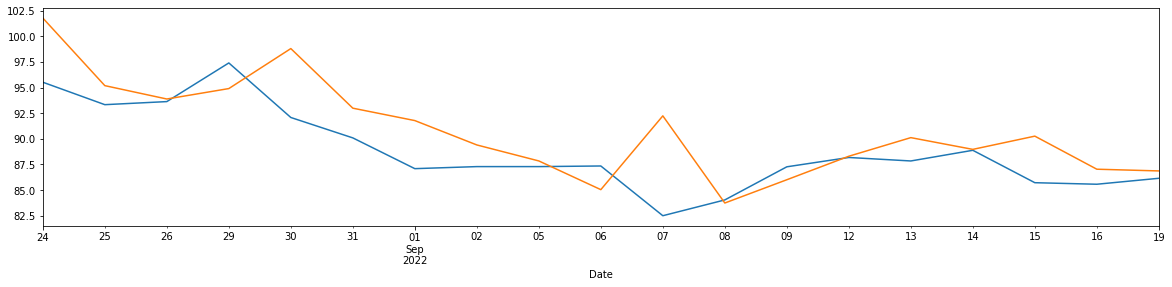

In [81]:
wti_test.Price[1:].plot(figsize=(20,4))
wti_test.P_Ret_Pred[1:].plot()
plt.show()